In [1]:
from xai.performance_benchmarking.benchmarking_pipelines import timed_benchmarking_pipeline
from xai.viz.modified_shap_plots import js_force_plot, dependence_plot, summary_plot
from xai.viz.util_viz import bar_plot
from xai.utils.model_utils import rf_feature_importances
from matplotlib import pyplot as plt
file_path = '../../datasets/boston_dataset.csv'

# Generate explanations with XAI module

In [2]:
expl_shap, x_shap, rf, t1 = timed_benchmarking_pipeline(model_type='rf', explainer_type='shap', 
                                                        data_file_name=file_path, target_name='y')
expl_lime, x_lime, rf, t2 = timed_benchmarking_pipeline(model_type='rf', explainer_type='lime', 
                                                        data_file_name=file_path, target_name='y')

Identified 0 out of 13 features as categorical.

Input dataset shape: 
x (404, 13), 	y 404
Model type: <class 'sklearn.ensemble.forest.RandomForestRegressor'>
Model test performance: 	MSE = 7.721, 	R^2 = 0.895
Process took 0.26 s.
Generating explanations ...
SHAP values identified for 102 samples.
Process took 0.20 s.
Output explanations shape: (102, 14)
Experiments took 0.20 s.
Identified 0 out of 13 features as categorical.

Input dataset shape: 
x (404, 13), 	y 404
Model type: <class 'sklearn.ensemble.forest.RandomForestRegressor'>
Model test performance: 	MSE = 7.721, 	R^2 = 0.895
Process took 0.25 s.
Generating explanations ...
	Instantiating LIME explainer ...
	Process took 0.01 s.
LIME values identified for 102 samples.
Process took 10.16 s.
Output explanations shape: (102, 14)
Experiments took 10.17 s.


# Visualisalise explanations
## Individualised:

In [3]:
help(js_force_plot)

Help on function js_force_plot in module xai.viz.modified_shap_plots:

js_force_plot(explanations, x, cmap_style=None)
    :param explanations: Matrix of additive attribution values (# samples x # features)
    :param x: numpy.array or pandas.DataFrame Matrix of feature values (# samples x # features)
    :param cmap_style: string setting the style of the colourmap. Currently either 'lime' or default SHAP value
    :return:



In [4]:
# zoom into a single sample (view rotated by 90 deg)
sample_n = 0
js_force_plot(expl_shap[sample_n, :], x_shap.iloc[sample_n,:])

In [5]:
# LIME explanation
sample_n = 0
js_force_plot(expl_lime[sample_n, :], x_lime.iloc[sample_n,:], cmap_style='lime')

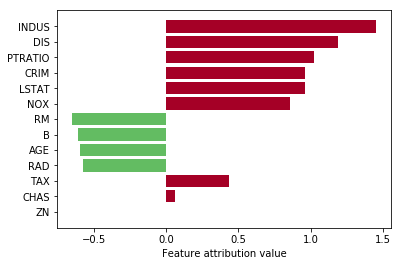

In [6]:
# Also can be viewed as bar plot
# bar_plot(expl_shap[sample_n, :], x_shap.iloc[sample_n,:])
bar_plot(expl_lime[sample_n, :], x_lime.iloc[sample_n,:], cmap_style='lime')

## Explanations accross the cohort:

In [7]:
# visualise the training set predictions 
js_force_plot(expl_shap, x_shap)

# Notes: 
# Similarity ordering is performed using hierarchical agglomerative clustering
# Red feature attributions push the score higher, blue - lower

In [8]:
# visualise the training set predictions 
js_force_plot(expl_lime, x_lime, cmap_style='lime')

# Notes: 
# Similarity ordering is performed using hierarchical agglomerative clustering
# Red feature attributions push the score higher, green - lower

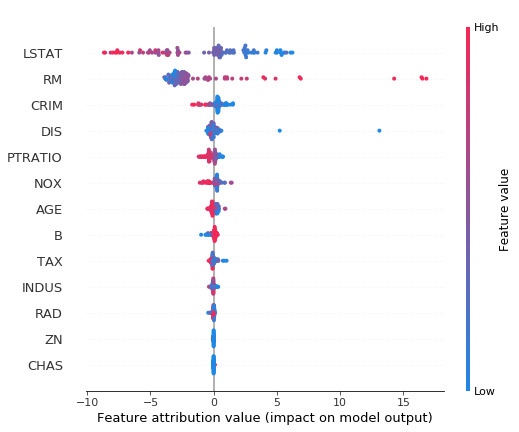

In [9]:
# summarize the effects of all the features
summary_plot(expl_shap, x_shap)

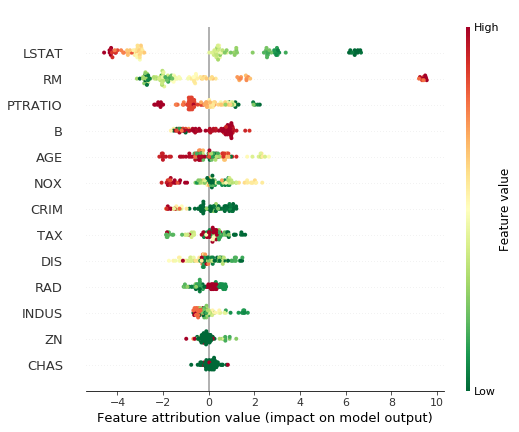

In [10]:
# summarize the effects of all the features
summary_plot(expl_lime, x_lime, cmap_style='lime')

## Compare with the native RF importance scores

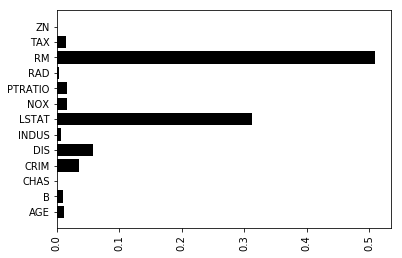

In [11]:
%matplotlib inline  
# RF importqance scores
rfs = rf_feature_importances(rf,x_shap)
plt.barh(rfs.index, rfs['ft_imp'], color='black')
plt.xticks(rotation=90)
fig = plt.gcf() 

## Dependence plots

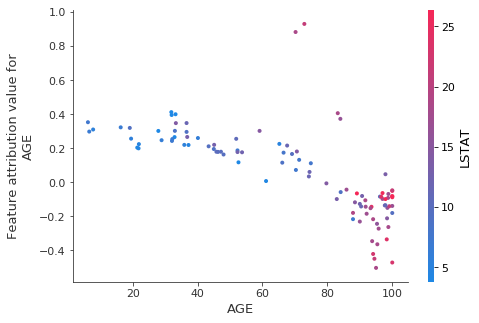

In [12]:
# a dependence plot to show the effect of a single feature across the whole dataset
feature = "AGE"
dependence_plot(feature, expl_shap, x_shap, interaction_index='LSTAT')

# NOTES: 
# plot below represents the change in predicted house price as AGE changes.
# y-axis represents the SHAP value of a given feature 
# x-axis: the value of the feature for all the examples in a dataset.  
# Vertical dispersion at a single value of AGE represents interaction effects with other features. 
# To help reveal these interactions dependence_plot automatically selects another feature for coloring. 
# In this case coloring by LSTAT highlights that AGE has less impact on home price for owners in less deprived areas

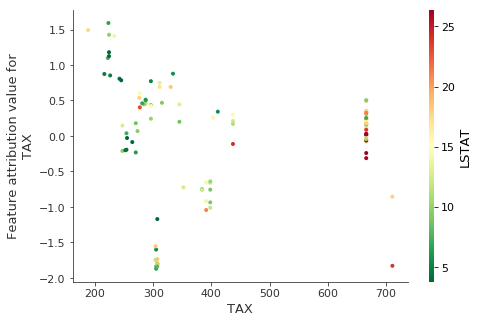

In [13]:
feature = "TAX"
dependence_plot(feature, expl_lime, x_lime, interaction_index='LSTAT', cmap_style='lime')

# NOTES: 
# plot below represents the change in predicted house price as TAX changes.
# y-axis represents the SHAP value of a given feature 
# x-axis: the value of the feature for all the examples in a dataset.  
# Vertical dispersion at a single value of TAX represents interaction effects with other features. 
# To help reveal these interactions dependence_plot automatically selects another feature for coloring. 